In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from collections import Counter

In [ ]:
data = []
for line in open("/content/iris.data", 'r'):
    try:
        items = line.strip().split(',')
        data.append(([float(i) for i in items[:4]], items[4]))
    except:
        pass

data

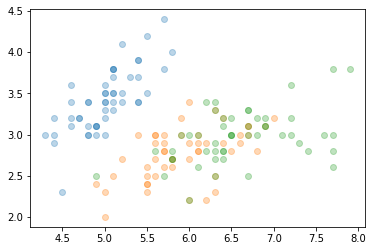

In [ ]:
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for c in classes:
    x0 = []
    x1 = []
    for d in data:
        if d [1] == c:
            x0.append(d[0][0])
            x1.append(d[0][1])

    plt.scatter(x0, x1, alpha = 0.3)

plt.show()

In [ ]:
# 유클리드 거리 함수
def distance(a, b):
    s = 0
    for ai, bi in zip(a, b):
        s += (bi - ai) ** 2
    return s ** 0.5

In [ ]:
def knn(query, k, train):
    # train 데이터 중 query와 가장 가까운 k개 찾기
    dist_cls = []
    for v, c in train:
        d = distance(query, v)
        dist_cls.append((d,c))
    dist_cls.sort()
    dist_cls = dist_cls[:k]

    # 가중치 부여
    cls_cnt = {}
    for d, c in dist_cls:
        if c not in cls_cnt:
            cls_cnt[c] = 0
        cls_cnt[c] += 1/(1 + d)

    return max(cls_cnt.items(), key = lambda cc: cc[1])[0]

    # 찾은 것 중, 가장 많은 class를 return 
    #cls_cnt = Counter([c for d, c in dist_cls])
    #return cls_cnt.most_common(1)[0][0]


100%|██████████| 30/30 [00:10<00:00,  2.85it/s]


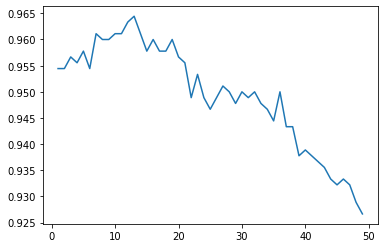

In [ ]:
n_trials = 30
max_k = 50

acc_avg = [0] * 50

for _ in tqdm(range(n_trials)):
    random.shuffle(data)
    train = data[:-30]
    test = data[-30:]

    for k in range(1, max_k):
        correct_cnt = 0
        for t_vec, t_cls in test:
            expected = knn(t_vec, k, train)
            if expected == t_cls:
                correct_cnt += 1
        accuracy = correct_cnt/len(test)
        acc_avg[k] += accuracy

acc_avg = [a / n_trials for a in acc_avg]
acc_avg = acc_avg[1:]
X = range(1,max_k)

plt.plot(X,acc_avg)
plt.show()